In [1]:
#Importing the libraries

import os
import numpy as np
import pandas as pd
import cv2 as cv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import random 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
path_train ="C:/python_lessons/January_Project/split_images/train/"
path_test = "C:/python_lessons/January_Project/split_images/val/"

Categories=["Round_elliptical","Cigar_elliptical","Tight_spiral"]

In [43]:
train_data = []
def create_data():
    for categories in Categories:
        path = os.path.join(path_train , categories)
        class_name = categories
        for img in random.sample(os.listdir(path),2500):
            try:
                img_array = cv.imread(os.path.join(path,img))
                new_array = cv.resize(img_array , (100,100))
                train_data.append([new_array , class_name])
            except Exception as e:
                pass
create_data()

In [44]:
random.shuffle(train_data)

In [45]:
x_train = []
y_train = []
for features,labels in train_data:
    x_train.append(features)
    y_train.append(labels)

In [46]:
df = pd.DataFrame(y_train,columns=["labels"])

In [47]:
df

,labels
0,Cigar_elliptical
1,Round_elliptical
2,Cigar_elliptical
3,Cigar_elliptical
4,Round_elliptical
...,...
7495,Cigar_elliptical
7496,Cigar_elliptical
7497,Round_elliptical
7498,Cigar_elliptical


C:\Users\HelenLuhaar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


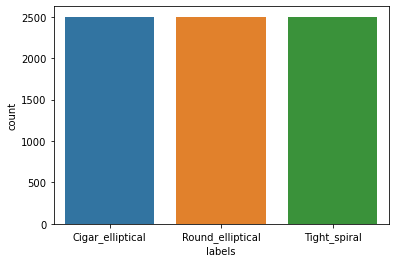

In [48]:
sns.countplot(df['labels']);

In [49]:
#Putting features into an array

x_train = np.array(x_train)

In [50]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

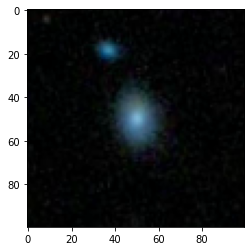

In [51]:
plt.imshow(x_train[55])

In [52]:
test_data = []
def create_data():
    for categories in Categories:
        path = os.path.join(path_test , categories)
        class_name = categories
        for img in random.sample(os.listdir(path),833):
            try:
                img_array = cv.imread(os.path.join(path,img))
                new_array = cv.resize(img_array , (100,100))
                test_data.append([new_array , class_name])
            except Exception as e:
                pass
create_data()

In [53]:
random.shuffle(test_data)

In [54]:
x_test = []
y_test = []
for features,labels in test_data:
    x_test.append(features)
    y_test.append(labels)

In [55]:
x_test = np.array(x_test)

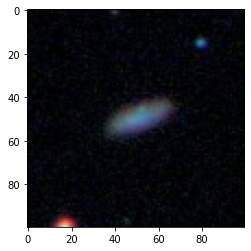

In [56]:
plt.imshow(x_test[3])

In [57]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [58]:
x_train.shape

(7500, 100, 100, 3)

In [59]:
x_test.shape

(2499, 100, 100, 3)

In [60]:
cnn = Sequential()
cnn.add(Conv2D(64,(3,3),activation="relu",input_shape=(100,100,3)))
cnn.add(MaxPool2D(2,2))
cnn.add(Conv2D(128,(5,5),activation="relu"))
cnn.add(MaxPool2D(2,2))
cnn.add(Flatten())
cnn.add(Dense(212,activation="relu"))
cnn.add(Dense(4,activation="softmax"))

In [61]:
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [62]:
history_cnn = cnn.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
235/235 [==============================] - 247s 1s/step - loss: 4.1548 - accuracy: 0.4767 - val_loss: 0.9957 - val_accuracy: 0.5286
Epoch 2/10
235/235 [==============================] - 239s 1s/step - loss: 0.9594 - accuracy: 0.5561 - val_loss: 0.9749 - val_accuracy: 0.5530
Epoch 3/10
235/235 [==============================] - 242s 1s/step - loss: 0.8988 - accuracy: 0.5883 - val_loss: 0.9880 - val_accuracy: 0.5558
Epoch 4/10
235/235 [==============================] - 241s 1s/step - loss: 0.8107 - accuracy: 0.6368 - val_loss: 1.0535 - val_accuracy: 0.4926
Epoch 5/10
235/235 [==============================] - 243s 1s/step - loss: 0.6786 - accuracy: 0.7057 - val_loss: 1.2680 - val_accuracy: 0.5298
Epoch 6/10
235/235 [==============================] - 243s 1s/step - loss: 0.5193 - accuracy: 0.7821 - val_loss: 1.5524 - val_accuracy: 0.4978
Epoch 7/10
235/235 [==============================] - 239s 1s/step - loss: 0.3749 - accuracy: 0.8455 - val_loss: 1.8305 - val_accuracy: 0.5202

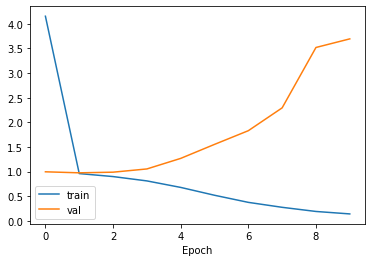

In [63]:
plt.plot(history_cnn.history["loss"])
plt.plot(history_cnn.history["val_loss"])
plt.xlabel('Epoch')
#plt.ylabel('*100%')
plt.legend(["train","val"]);

In [64]:
y_pred = cnn.predict(x_test)

79/79 [==============================] - 20s 248ms/step


<AxesSubplot:>

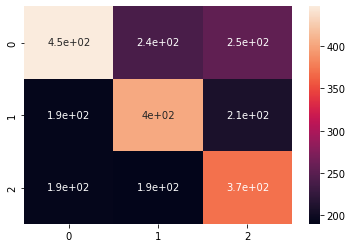

In [65]:
sns.heatmap(confusion_matrix(y_pred.argmax(axis=1),y_test),annot=True)

In [66]:
confusion_matrix(y_pred.argmax(axis=1),y_test)

array([[447, 240, 254],
       [193, 403, 209],
       [193, 190, 370]], dtype=int64)

In [67]:
accuracy_score(y_pred.argmax(axis=1),y_test)

0.4881952781112445